In [ ]:

import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D


In [ ]:
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
x_train=x_train.astype('float32') #gán kiểu dữ liệu
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

<function matplotlib.pyplot.show>

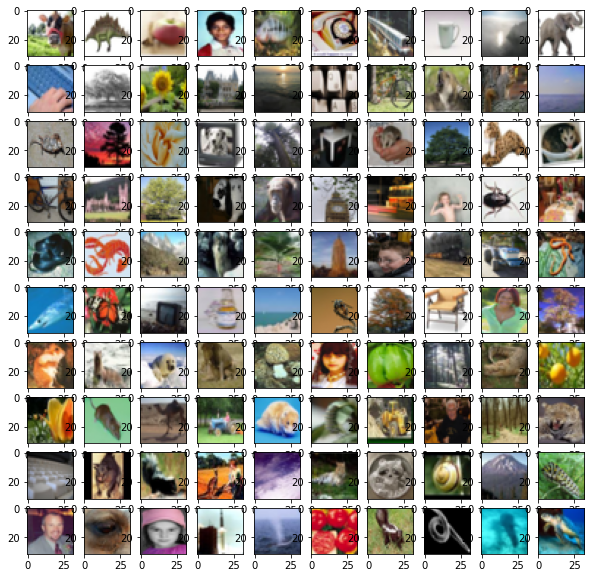

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(x_train[i])
plt.show


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(784,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(100,activation='Softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 784)               2409232   
                                                                 
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 100)               51300     
                                                                 
Total params: 2,862,452
Trainable params: 2,862,452
Non-trainable params: 0
_________________________________________________________________


In [ ]:

opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs = 30,verbose = 1,validation_data=(x_test,y_test))

In [ ]:
model.save('cifar100.h5')

In [23]:
model1=load_model('cifar100.h5')

array([8])

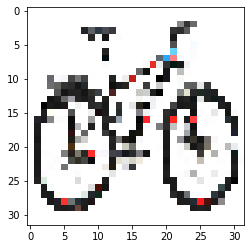

In [25]:
img=load_img('/content/xe đạp.jpg',target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=1)